Loop time: 0.4751s, Vectorized time: 0.0068s
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
None
  category  value        date
0        A     10  2025-08-01
1        B     15  2025-08-02
2        A     12  2025-08-03
3        B     18  2025-08-04
4        C     25  2025-08-05
Summary saved to data\processed\summary.csv
Plot saved to data\processed\summary_plot.png


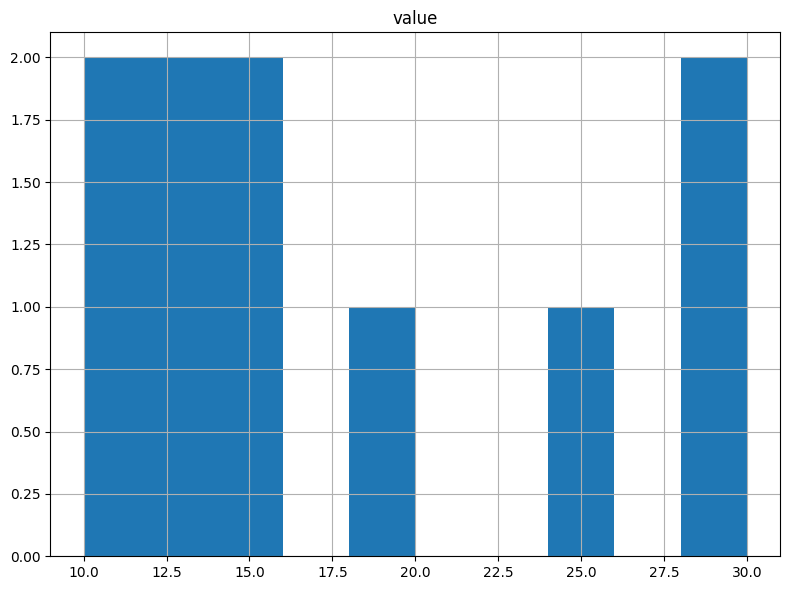

In [6]:
import os
from pathlib import Path
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def numpy_demo():
    n = 1_000_000
    arr1 = np.arange(n)
    arr2 = np.arange(n)

    # loop version
    t0 = time.time()
    loop_sum = [arr1[i] + arr2[i] for i in range(n)]
    loop_time = time.time() - t0

    # vectorized version
    t0 = time.time()
    vec_sum = arr1 + arr2
    vec_time = time.time() - t0

    print(f"Loop time: {loop_time:.4f}s, Vectorized time: {vec_time:.4f}s")
    return loop_sum, vec_sum

In [ ]:
def load_data(file_path="data/starter_data.csv"):
    df = pd.read_csv(file_path)
    print(df.info())
    print(df.head())
    return df

In [ ]:
def get_summary_stats(df, group_col=None, out_dir="data/processed"):
    """Generate summary stats and save as CSV + JSON"""
    Path(out_dir).mkdir(parents=True, exist_ok=True)

    summary = df.describe(include="all")

    if group_col and group_col in df.columns:
        grouped = df.groupby(group_col).mean(numeric_only=True)
    else:
        grouped = None

    # save summary
    summary_file = Path(out_dir) / "summary.csv"
    summary.to_csv(summary_file)
    summary.to_json(Path(out_dir) / "summary.json", indent=2)

    print(f"Summary saved to {summary_file}")

    # Bonus: plot
    num_cols = df.select_dtypes(include="number").columns
    if len(num_cols) > 0:
        df[num_cols].hist(figsize=(8, 6))
        plt.tight_layout()
        plot_file = Path(out_dir) / "summary_plot.png"
        plt.savefig(plot_file)
        print(f"Plot saved to {plot_file}")

    return summary, grouped

In [ ]:
if __name__ == "__main__":
    # 1. numpy demo
    numpy_demo()

    # 2. load dataset
    df = load_data("starter_data.csv")

    # 3. get summary + save
    summary, grouped = get_summary_stats(df, group_col=df.columns[0])

    # Bonus: move get_summary_stats to src/utils.py later for reuse